In [2]:
#correlations
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
print('done')

done


In [10]:
df = pd.DataFrame()
df['x'] = np.array([1,2,3,4,5])
df['y'] = np.array([-5,-4,-3,-2,-1])
r,p = pearsonr(df['x'], df['y'])

In [11]:
print(f"the r value is {r}")

the r value is 1.0


In [12]:
print(f"the p value is {p}")

the p value is 0.0


<AxesSubplot:xlabel='x', ylabel='y'>

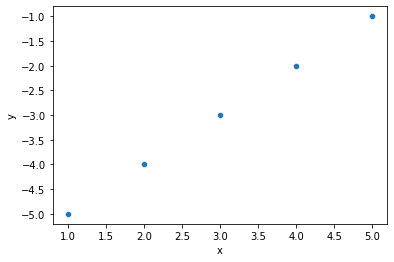

In [13]:
sns.scatterplot(x='x', y='y', data=df)

In [14]:
#linear regression
df = pd.read_csv("Data Science Salary 2021 to 2023.csv")

In [15]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


In [16]:
#feature engineering
df.groupby('employment_type').count()

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
employment_type,,,,,,,,
CT,10,10,10,10,10,10,10,10
FL,10,10,10,10,10,10,10,10
FT,3724,3724,3724,3724,3724,3724,3724,3724
PT,17,17,17,17,17,17,17,17


In [19]:
#turn into boolean value
df['is_FT'] = df['employment_type'] == 'FT'

In [20]:
df.query("employment_type!='FT'")[['is_FT', 'employment_type']] 

,is_FT,employment_type
78,False,PT
178,False,CT
179,False,CT
754,False,FL
1095,False,FL
1792,False,PT
1798,False,PT
1825,False,FL
1833,False,FL
1840,False,PT


In [23]:
#feature engineer experience level as ordinal value
df['experience_level'].unique()

array(['EN', 'EX', 'MI', 'SE'], dtype=object)

In [25]:
exp_mapper = {"EN": 1, "MI":2, "SE":3, "EX":4}

#new column
df['seniority'] = df["experience_level"].replace(exp_mapper)

In [28]:
df[['seniority', 'experience_level']]

,seniority,experience_level
0,1,EN
1,1,EN
2,1,EN
3,1,EN
4,1,EN
...,...,...
3756,3,SE
3757,3,SE
3758,3,SE
3759,3,SE


In [29]:
#company size
size_mapper = {"S":1, "M":2, "L":3}
df['company_size_int']=df['company_size'].replace(size_mapper)

In [30]:
df[['company_size_int', 'company_size']]

,company_size_int,company_size
0,3,L
1,3,L
2,3,L
3,3,L
4,3,L
...,...,...
3756,2,M
3757,1,S
3758,2,M
3759,1,S


In [31]:
#OLS with statsmodels
import statsmodels.formula.api as smf

/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
mod = smf.ols("salary_in_usd ~ work_year + seniority + company_size_int", data=df)

In [33]:
res = mod.fit()

In [34]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     350.7
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          9.14e-201
Time:                        20:26:46   Log-Likelihood:                -46436.
No. Observations:                3761   AIC:                         9.288e+04
Df Residuals:                    3757   BIC:                         9.290e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.838e+07   2.73e+06  

<AxesSubplot:xlabel='seniority', ylabel='salary_in_usd'>

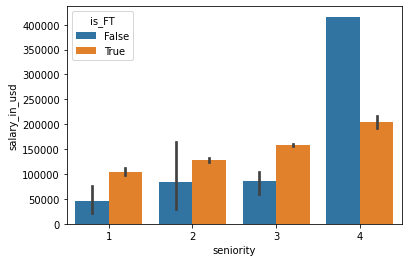

In [35]:

sns.barplot(x='seniority', y='salary_in_usd', data=df.query("company_location=='US'"), hue='is_FT')

In [36]:
#Running interactions
mod = smf.ols(formula = 'salary_in_usd ~ is_FT * seniority', data=df.query("company_location=='US'"))

In [37]:
res= mod.fit()

In [38]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     139.9
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           6.80e-85
Time:                        20:38:03   Log-Likelihood:                -37414.
No. Observations:                3045   AIC:                         7.484e+04
Df Residuals:                    3041   BIC:                         7.486e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -3

In [39]:
#logistic regression
from sklearn.linear_model import LogisticRegression

/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  

In [40]:
from sklearn.datasets import load_iris

/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [41]:
iris = load_iris()

/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to

In [42]:
#training data and targets(what we are trying to predict)
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [43]:
#targets represent different properties of the flowers
#separate training and target data
x, y = iris.data, iris.target

In [44]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [62]:
#feed training data into prediction
mod = LogisticRegression(max_iter = 1000, C=1, solver='liblinear', penalty='l2')
clf = mod.fit(x,y)
clf.predict(x)

/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
#compare predictive to actual values (y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
#beta values
clf.coef_

array([[ 0.41021713,  1.46416217, -2.26003266, -1.02103509],
       [ 0.4275087 , -1.61211605,  0.5758173 , -1.40617325],
       [-1.70751526, -1.53427768,  2.47096755,  2.55537041]])

In [65]:
#k-fold cross validation and hyperparameter tuning
from sklearn.model_selection import KFold, GridSearchCV

In [67]:
#State the number of folds
num_folds = 5

#initialize k fold CV
kf = KFold(n_splits = num_folds)

#define hyperparameters to tune
param_grid = {
    'C':[0.01, 0.1, 1],
    'penalty':['l1', 'l2']
    
}

#model
model = LogisticRegression(max_iter=1000, solver='liblinear')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf)

In [68]:
grid_search.fit(x,y)

/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
D

/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
grid_search.best_params_

{'C': 1, 'penalty': 'l1'}

In [78]:
#xgboost
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
iris = load_iris()
x,y = iris.data, iris.target

/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
/Users/amelia/opt/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [80]:
len(x_train)

120

In [81]:
len(x_test)

30

In [83]:
clf = XGBClassifier(n_estimators=20, max_depth=3, learning_rate=1, objective='binary:logistic')
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [84]:
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 0, 0, 1, 0, 2])

In [85]:
y_test

array([0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 0, 0, 1, 0, 2])